In [1]:
import numpy as np
from scipy.stats import multivariate_normal as Normal
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import LinearSegmentedColormap
from sklearn.naive_bayes import GaussianNB
from math import sqrt
from sklearn import metrics
from sklearn.metrics import f1_score, roc_curve, precision_score, recall_score
from tqdm import tqdm
import pandas as pd
import random

In [2]:
def auc_score(y_true,y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=1)
    return metrics.auc(fpr, tpr)

In [3]:
def print_metrics(name_algortihm, classifier):
    print(name_algortihm)
    print("F1 score: " + str(f1_score(y_test,classifier.predict(X_test))))
    print("Accuracy: " + str(accuracy_score(y_test,classifier.predict(X_test))))
    print("Precision: " + str(precision_score(y_test, classifier.predict(X_test))))
    print("Recall: " + str(recall_score(y_test, classifier.predict(X_test))))
    print("AUC: " + str(auc_score(y_test, classifier.predict(X_test))))

In [4]:
data = pd.read_pickle("./data.pkl")

In [5]:
categorical_columns = [data.columns.get_loc(c) for c in data.select_dtypes(exclude=["number"]).columns if c in data]

# split data into X and y
X = data.loc[:, data.columns != 'bot']
Y = data.loc[:, data.columns == 'bot'].to_numpy()

# split data into train and test sets
seed = 10
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [6]:
# Base case

gaussianNB_model = GaussianNB()
gaussianNB_model.fit(X_train,y_train)

f1_base_bayes = f1_score(y_test,gaussianNB_model.predict(X_test))

/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [7]:
# Undersampling of training set

X_train_majority = X_train[y_train < 1] # human (non-bots) => label 0 : are majority
X_train_minority = X_train[y_train > 0]

N = np.shape(y_train)[0]

pi_mi = y_train.sum()/np.shape(y_train)[0]

X_train_majority = X_train_majority.to_numpy()
X_train_minority = X_train_minority.to_numpy()

y_test = np.where(y_test < 0.5, -1, 1)

y_train = y_train.flatten()
y_test = y_test.flatten()

In [8]:
betas = [0.1,0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99999]
# betas = [0.9]
f1scores_under = []
accuracy_under = []
   
for Beta in tqdm(betas):
    
    X_train_majority_undersampled = X_train_majority[random.sample(range(1, int((1-pi_mi)*N)),int(Beta*(1-pi_mi)*N)), :]
    X_train = np.r_[X_train_majority_undersampled,X_train_minority]
    y_train = np.r_[[-1]*len(X_train_majority_undersampled), [1]*len(X_train_minority)]
    
    gaussianNB_model = GaussianNB()
    gaussianNB_model.fit(X_train,y_train)
    
    print_metrics(Beta,gaussianNB_model)
    
    f1scores_under.append(f1_score(y_test,gaussianNB_model.predict(X_test)))
    
    
    


  0%|          | 0/12 [00:00<?, ?it/s]

0.1
F1 score: 0.4198473282442748
Accuracy: 0.26570048309178745
Precision: 0.26570048309178745
Recall: 1.0


  8%|▊         | 1/12 [00:00<00:03,  3.14it/s]

AUC: 0.5
0.15
F1 score: 0.4198473282442748
Accuracy: 0.26570048309178745


 17%|█▋        | 2/12 [00:00<00:03,  3.23it/s]

Precision: 0.26570048309178745
Recall: 1.0
AUC: 0.5
0.2


 25%|██▌       | 3/12 [00:00<00:02,  3.29it/s]

F1 score: 0.4198473282442748
Accuracy: 0.26570048309178745
Precision: 0.26570048309178745
Recall: 1.0
AUC: 0.5
0.25
F1 score: 0.4198473282442748
Accuracy: 0.26570048309178745
Precision: 0.26570048309178745
Recall: 1.0


 33%|███▎      | 4/12 [00:01<00:02,  3.18it/s]

AUC: 0.5
0.3
F1 score: 0.2973977695167286


 42%|████▏     | 5/12 [00:01<00:02,  3.16it/s]

Accuracy: 0.7086031452358927
Precision: 0.41379310344827586
Recall: 0.23210831721470018
AUC: 0.5565636770843938
0.4
F1 score: 0.2973977695167286
Accuracy: 0.7086031452358927
Precision: 0.41379310344827586
Recall: 0.23210831721470018
AUC: 0.5565636770843938


 50%|█████     | 6/12 [00:01<00:01,  3.15it/s]

0.5
F1 score: 0.2973977695167286
Accuracy: 0.7086031452358927
Precision: 0.41379310344827586
Recall: 0.23210831721470018
AUC: 0.5565636770843938


 58%|█████▊    | 7/12 [00:02<00:01,  3.03it/s]

0.6
F1 score: 0.2973977695167286
Accuracy: 0.7086031452358927
Precision: 0.41379310344827586
Recall: 0.23210831721470018
AUC: 0.5565636770843938


 67%|██████▋   | 8/12 [00:02<00:01,  2.92it/s]

0.7
F1 score: 0.2973977695167286
Accuracy: 0.7086031452358927
Precision: 0.41379310344827586


 75%|███████▌  | 9/12 [00:03<00:01,  2.58it/s]

Recall: 0.23210831721470018
AUC: 0.5565636770843938
0.8
F1 score: 0.2973977695167286
Accuracy: 0.7086031452358927
Precision: 0.41379310344827586
Recall: 0.23210831721470018
AUC: 0.5565636770843938


 83%|████████▎ | 10/12 [00:03<00:00,  2.35it/s]

0.9
F1 score: 0.2973977695167286
Accuracy: 0.7086031452358927
Precision: 0.41379310344827586
Recall: 0.23210831721470018


 92%|█████████▏| 11/12 [00:04<00:00,  2.38it/s]

AUC: 0.5565636770843938
0.99999
F1 score: 0.2973977695167286
Accuracy: 0.7086031452358927
Precision: 0.41379310344827586
Recall: 0.23210831721470018
AUC: 0.5565636770843938


100%|██████████| 12/12 [00:04<00:00,  2.37it/s]


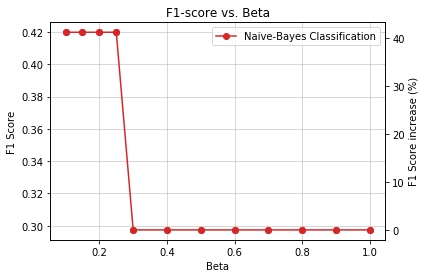

In [9]:
# Plot results
plt.close()
fig = plt.figure()

ax1 = plt.subplot(111)
plt.grid(True,which='major',linewidth=0.5)
plt.grid(True,which='minor',linewidth=0.1)
#plt.plot(betas,f1scores_knn,'-o',color='tab:blue',label='KKN Classification')
plt.plot(betas,f1scores_under,'-o',color='tab:red',label='Naive-Bayes Classification')
ax1.set(title='F1-score vs. Beta', xlabel = 'Beta', ylabel = 'F1 Score')
plt.legend(loc='lower right')
plt.legend()

ax2 = ax1.twinx()
#plt.plot(betas,(f1scores_knn-f1_base_knn)/f1_base_knn*100,'o',color='tab:blue')
plt.plot(betas,(f1scores_under-f1_base_bayes)/f1_base_bayes*100,'o',color='tab:red')
ax2.set_ylabel('F1 Score increase (%)')
plt.show()
# print(f1scores_under)
# print(betas)

In [10]:
f1_base_bayes

0.2973977695167286